In [2]:
import pandas as pd
import numpy as np
from zoneinfo import ZoneInfo
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
import sys
from pathlib import Path

project_dir = Path().resolve().parent.parent
sys.path.append(str(project_dir))

# import my own modules
from commonfunc.db_handler import DbHandler

#### Getting Data and Process Date Columns

In [4]:
import os

# using absolute db path
db_file = os.path.join(project_dir, "data\crypto.db") 
db = DbHandler(db_file)

crypto = 'BTC'
crypto_lower = 'btc'

In [ ]:
# query price data
query = f"SELECT * FROM {crypto_lower}_hourly order by time" # contains hourly data from 2021
df = db.read_from_db(query)

# convert dt columns types to datetime
df['utc_dt'] = pd.to_datetime(df['utc_dt'])
df['nyc_dt'] = df['utc_dt'].apply(lambda x: x.astimezone(ZoneInfo("America/New_York")))

df['year'] = df['utc_dt'].dt.year
df['month'] = df['utc_dt'].dt.month
df['day'] = df['utc_dt'].dt.day
df['weekday'] = df['utc_dt'].dt.weekday # Monday=0, Sunday=6
df['hour'] = df['utc_dt'].dt.hour

# outlier for timestamp 1595300400, remove this record
# df = df[df['time']!=1595300400]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91192 entries, 0 to 91192
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype                           
---  ------      --------------  -----                           
 0   time        91192 non-null  int64                           
 1   utc_dt      91192 non-null  datetime64[ns, UTC]             
 2   nyc_dt      91192 non-null  datetime64[ns, America/New_York]
 3   high        91192 non-null  float64                         
 4   low         91192 non-null  float64                         
 5   open        91192 non-null  float64                         
 6   close       91192 non-null  float64                         
 7   volumefrom  91192 non-null  float64                         
 8   volumeto    91192 non-null  float64                         
 9   avg         91192 non-null  float64                         
 10  year        91192 non-null  int64                           
 11  month       91192 non-null  

#### Visualizing Pricing Trend

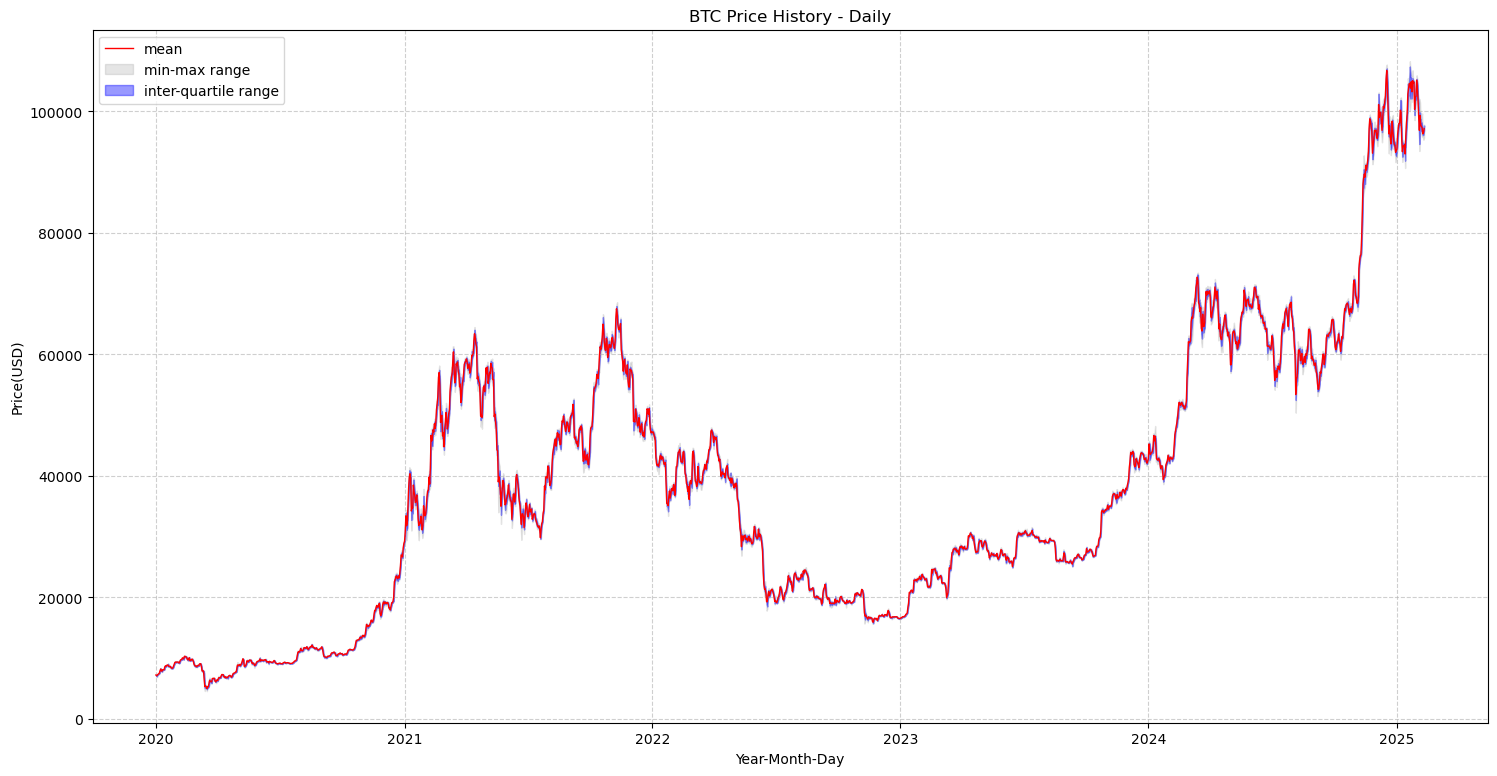

In [6]:
#-------------------- plot mean, min/max/25%/75%
#-----------by year/month/day
res = df.groupby(['year','month','day'])['avg'].describe().reset_index()
res['ymd'] = pd.to_datetime(res['year'].astype(str) + '-' + res['month'].astype(str) + '-' + res['day'].astype(str))

# only visualize for 2020 and later
res = res[res['year']>=2020].copy()

plt.figure(figsize=(18,9))

# mean
plt.plot(res['ymd'],res['mean'],'r-',label='mean',linewidth=1)
# range
plt.fill_between(res['ymd'], res['min'], res['max'], color='grey', alpha=0.2, label='min-max range')
plt.fill_between(res['ymd'], res['25%'], res['75%'], color='blue', alpha=0.4, label='inter-quartile range')

plt.title('BTC Price History - Daily')
plt.xlabel('Year-Month-Day')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(linestyle='--', alpha=0.6)

plt.show()

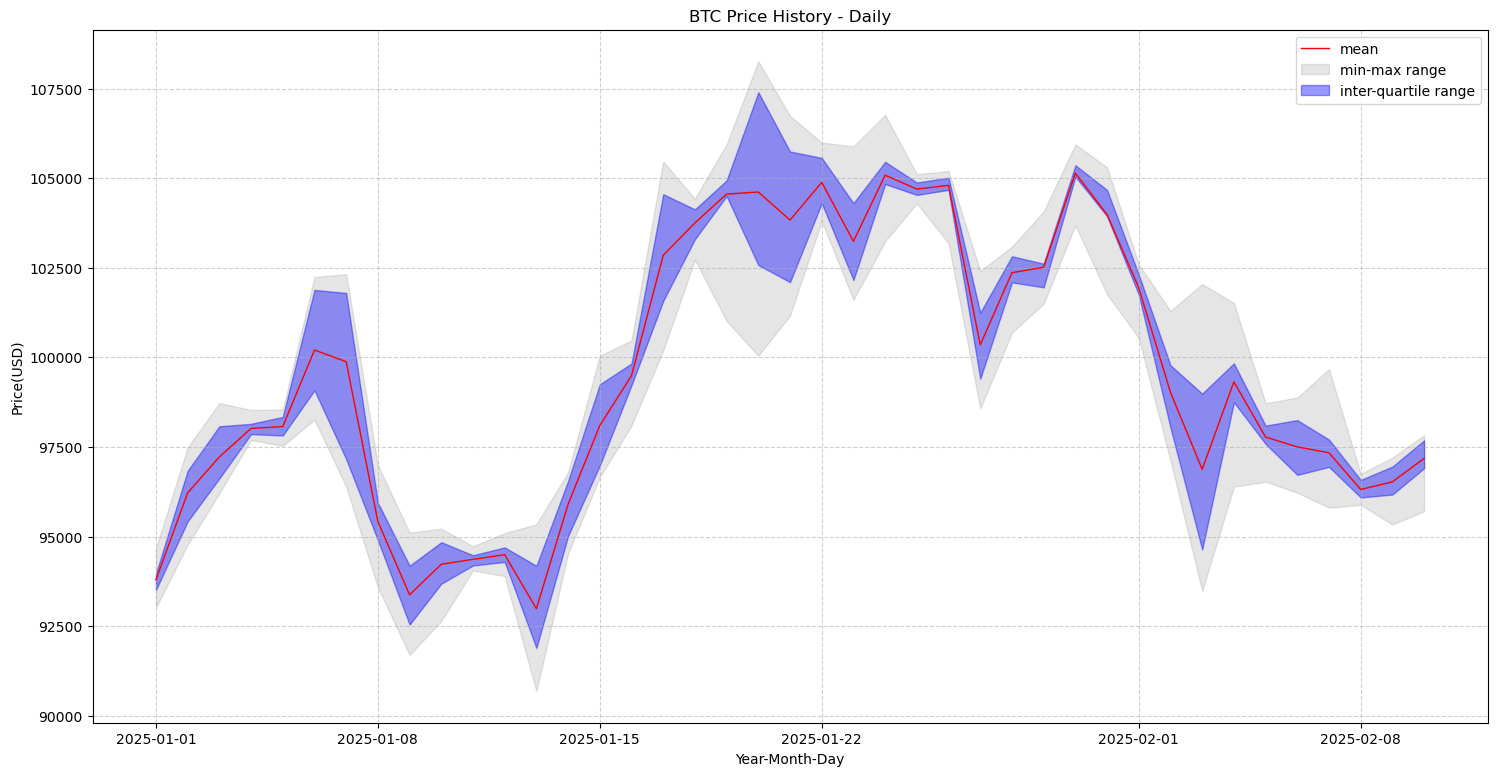

In [7]:
#-------------------- plot mean, min/max/25%/75%
#-----------by year/month/day
res = df.groupby(['year','month','day'])['avg'].describe().reset_index()
res['ymd'] = pd.to_datetime(res['year'].astype(str) + '-' + res['month'].astype(str) + '-' + res['day'].astype(str))

# only visualize for 2020 and later
res = res[res['year']>=2025].copy()

plt.figure(figsize=(18,9))

# mean
plt.plot(res['ymd'],res['mean'],'r-',label='mean',linewidth=1)
# range
plt.fill_between(res['ymd'], res['min'], res['max'], color='grey', alpha=0.2, label='min-max range')
plt.fill_between(res['ymd'], res['25%'], res['75%'], color='blue', alpha=0.4, label='inter-quartile range')

plt.title('BTC Price History - Daily')
plt.xlabel('Year-Month-Day')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(linestyle='--', alpha=0.6)

plt.show()

#### Visualizing Trading Volume Trend

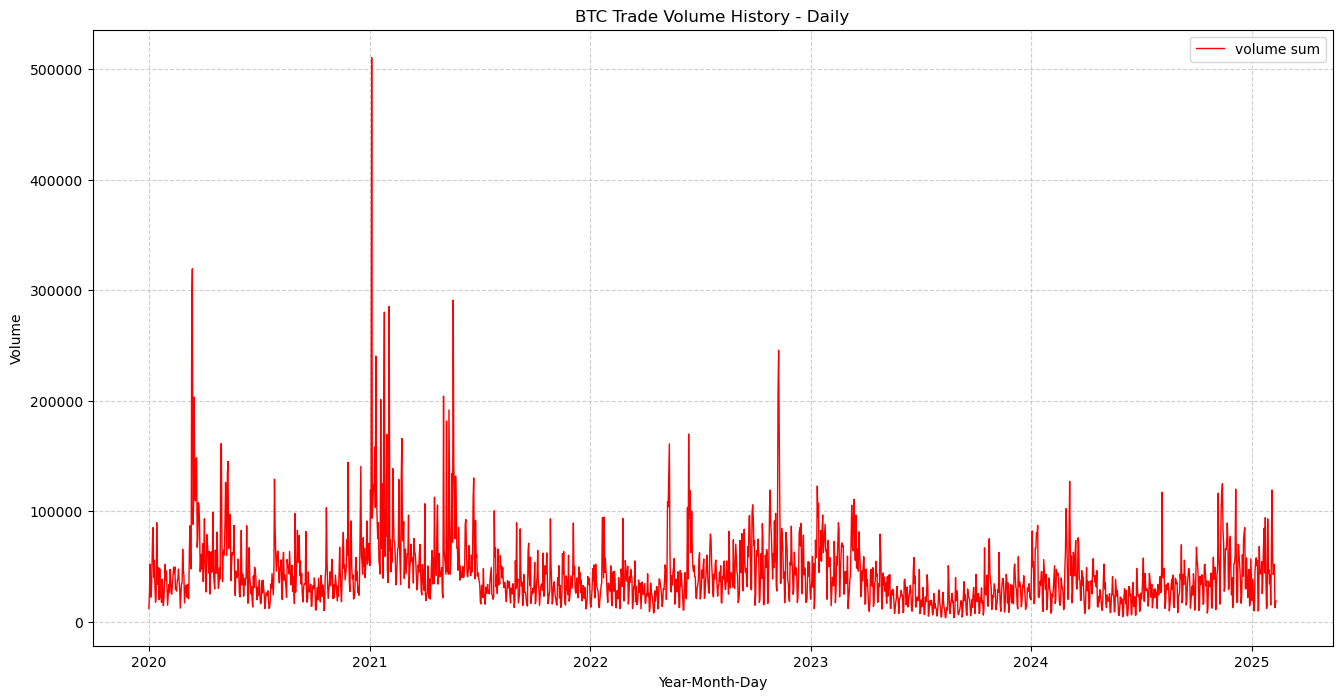

In [23]:
#-------------------- plot trading volume
#-----------by year/month/day
res = df.groupby(['year','month','day'])['volumefrom'].sum().reset_index()
res['ymd'] = pd.to_datetime(res['year'].astype(str) + '-' + res['month'].astype(str) + '-' + res['day'].astype(str))

# only visualize for 2020 and later
res = res[res['year']>=2020].copy()

plt.figure(figsize=(16,8))

# plot volume
plt.plot(res['ymd'],res['volumefrom'],'r-',label='volume sum',linewidth=1)

plt.title('BTC Trade Volume History - Daily')
plt.xlabel('Year-Month-Day')
plt.ylabel('Volume')
plt.legend()
plt.grid(linestyle='--', alpha=0.6)

plt.show()

#### A Glimpse at Price Fluctuation within a Month

BTC price fluctuation is more turbulent after 2024:
- It's generally safe to expect a range of 6*std within a month, which is roughly $20,000, or 25% to 30% of its highest price of the month.
- High volatility is rarely seen to last for several months - it alternates from month to month.

            ym           std    std_pct
64  2020-01-01    635.403454   7.625136
65  2020-02-01    448.435912   4.645861
66  2020-03-01   1345.754214  19.378611
67  2020-04-01    506.592236   7.050315
68  2020-05-01    372.899480   4.038123
69  2020-06-01    235.246055   2.486670
70  2020-07-01    650.458862   6.812831
71  2020-08-01    242.044788   2.080330
72  2020-09-01    407.742879   3.824468
73  2020-10-01   1058.079720   8.939665
74  2020-11-01   1691.266872  10.237619
75  2020-12-01   3290.847470  15.094186
76  2021-01-01   2949.802169   8.541579
77  2021-02-01   6335.439545  13.754716
78  2021-03-01   3805.046281   6.965149
79  2021-04-01   3703.400810   6.485463
80  2021-05-01   8960.132494  19.083462
81  2021-06-01   2324.580860   6.499306
82  2021-07-01   2907.932796   8.493002
83  2021-08-01   3279.210222   7.198388
84  2021-09-01   2931.777452   6.365492
85  2021-10-01   5268.702839   9.137713
86  2021-11-01   3649.211257   6.014529
87  2021-12-01   2769.794409   5.598962


<Figure size 1800x900 with 0 Axes>

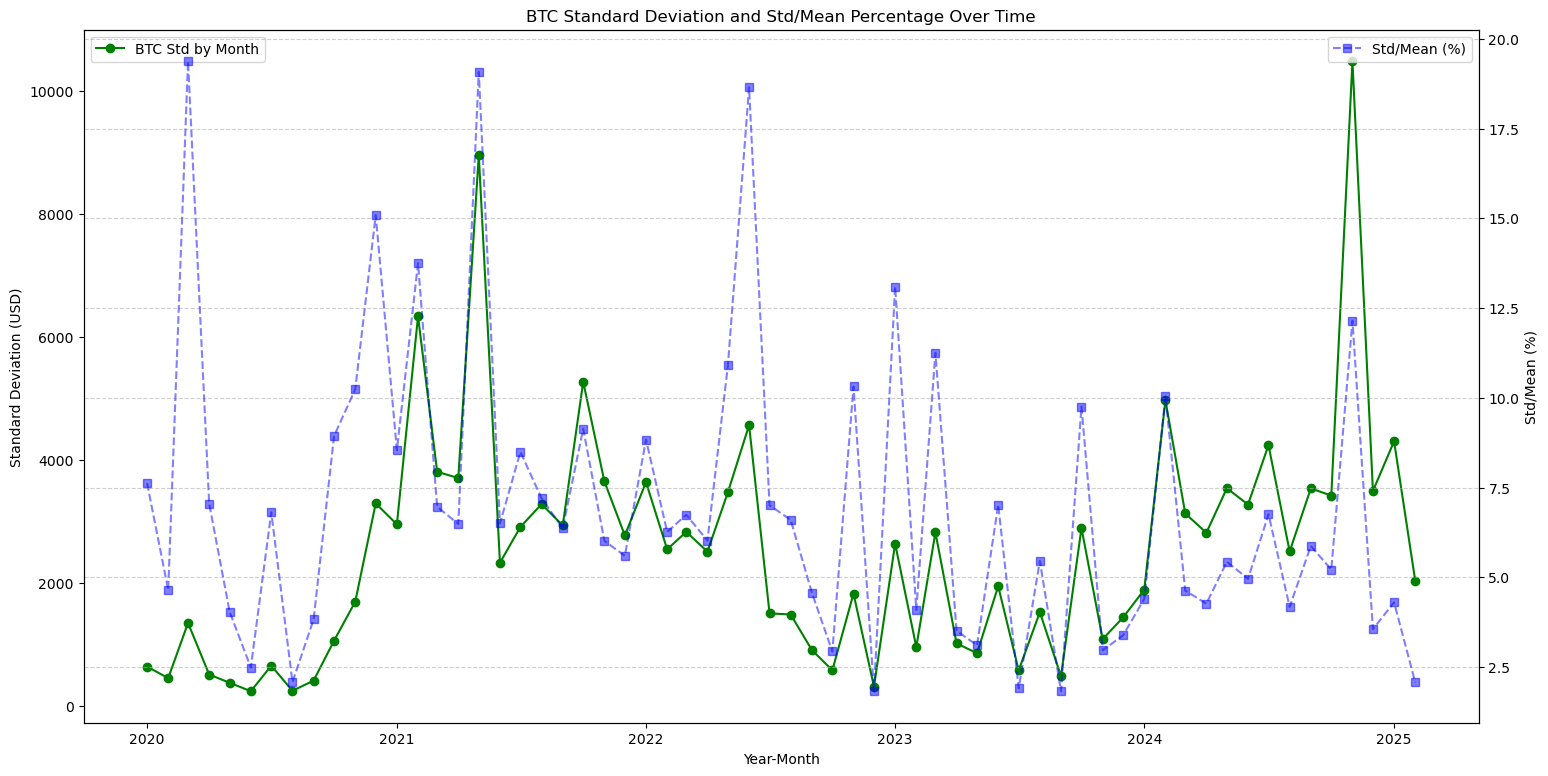

In [8]:
# plot std
#-----------by year/month
res = df.groupby(['year','month'])['avg'].describe().reset_index()
res['ym'] = pd.to_datetime(res['year'].astype(str) + '-' + res['month'].astype(str) + '-01')
res = res[res['year']>=2020]

plt.figure(figsize=(18,9))

# std/mean
res['std_pct'] = res['std']*100/res['mean']
print(res[['ym','std','std_pct']])

# plot with 2 axis
fig, ax1 = plt.subplots(figsize=(18,9))

ax1.plot(res['ym'],res['std'],'go-',label='BTC Std by Month')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Standard Deviation (USD)')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(res['ym'],res['std_pct'],'bs--',label='Std/Mean (%)',alpha=0.5)
ax2.set_ylabel('Std/Mean (%)')
ax2.legend(loc='upper right')

plt.title('BTC Standard Deviation and Std/Mean Percentage Over Time')
plt.grid(linestyle='--', alpha=0.6)

#### Hourly Data Examination

Surprisingly, the ratio between Open/Close Range and High/Low Range is pretty much evenly distributed (<0.8), which means the open/close prices indicate very little about high/low prices.

count    9760.000000
mean        0.015438
std         0.525104
min        -0.999982
25%        -0.437696
50%         0.020840
75%         0.463717
max         0.999981
Name: ratio, dtype: float64


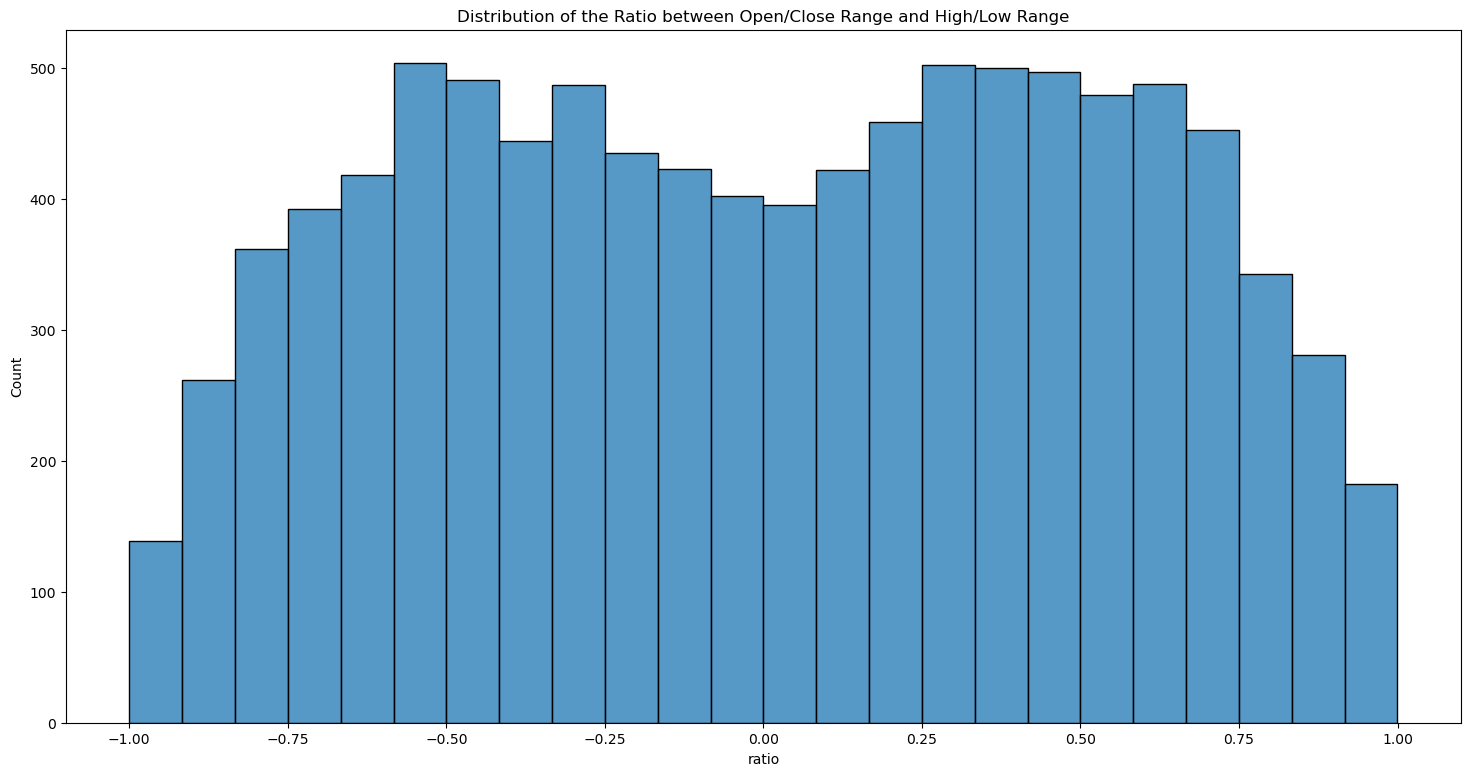

In [9]:
# hourly openclose/minmax ratio distribution
df['minmax_range'] = df['high'] - df['low']
df['openclose_range'] = df['close'] - df['open']
df['ratio'] = df['openclose_range']/df['minmax_range']

df24 = df[df['year']>=2024] 

print(df24['ratio'].describe())

plt.figure(figsize=(18,9))
sns.histplot(x=df24['ratio'])
plt.title('Distribution of the Ratio between Open/Close Range and High/Low Range')
plt.show()

BTC price fluctuation within an hour can be horrible - keep below numbers in mind when dealing contract
- BTC price can rise/drop up to 8.75% of its average trading price during an hour!
- Generally (in 95% of cases), BTC price change within an hour is less than 1280, or roughly 2%

0.00      24.6400
0.05     131.6985
0.10     168.6740
0.15     197.9170
0.20     225.6020
0.25     252.5475
0.30     278.7400
0.35     305.3360
0.40     335.2060
0.45     363.0455
0.50     396.0100
0.55     433.5050
0.60     475.7900
0.65     523.6485
0.70     580.0450
0.75     649.6575
0.80     733.5540
0.85     837.0890
0.90    1000.1230
0.95    1323.9030
1.00    7388.2700
Name: minmax_range, dtype: float64


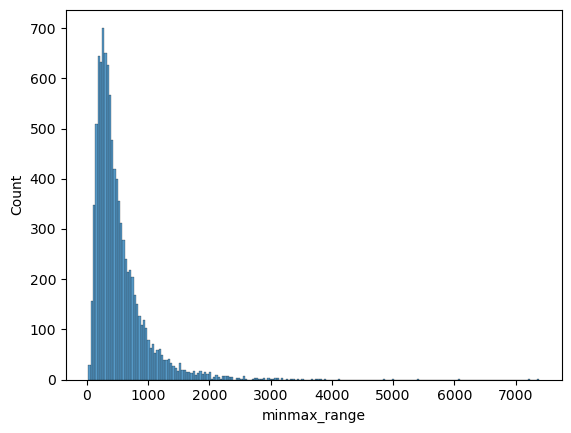

In [10]:
# minmax range distribution
print(df24['minmax_range'].quantile([x/20 for x in range(21)]))
sns.histplot(x=df24['minmax_range'])
plt.show()

0.00    0.000573
0.05    0.002180
0.10    0.002732
0.15    0.003154
0.20    0.003556
0.25    0.003913
0.30    0.004261
0.35    0.004623
0.40    0.005031
0.45    0.005406
0.50    0.005849
0.55    0.006343
0.60    0.006898
0.65    0.007518
0.70    0.008283
0.75    0.009208
0.80    0.010377
0.85    0.011813
0.90    0.014062
0.95    0.018157
1.00    0.087875
dtype: float64


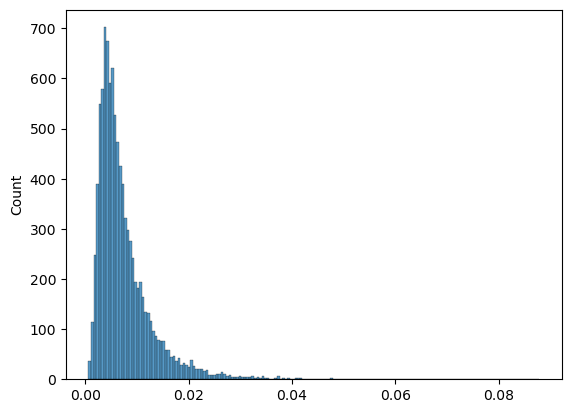

In [11]:
print((df24['minmax_range']/df24['avg']).quantile([x/20 for x in range(21)]))
sns.histplot(x=df24['minmax_range']/df['avg'])
plt.show()

There is high correlation (0.46) between the price change and the number of BTC traded - volume traded typically means higher price change.

In [12]:
# ABS trade volume change vs. price change after 2024
df24['abs_price_change'] = np.abs(df24['avg'] - df24['avg'].shift(1)) / df24['avg'].shift(1)
df24['abs_volume_change'] = np.abs(df24['volumefrom'] - df24['volumefrom'].shift(1))/ df24['avg'].shift(1)

# correlation between price change and volume traded
print(df24['abs_price_change'].corr(df24['abs_volume_change'])) # from hour to hour
print(np.abs(df24['openclose_range']).corr(df24['volumefrom'])) # within an hour

0.461272503884601
0.5757111264945636


C:\Users\elisa\AppData\Local\Temp\ipykernel_17984\4293339652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24['abs_price_change'] = np.abs(df24['avg'] - df24['avg'].shift(1)) / df24['avg'].shift(1)
C:\Users\elisa\AppData\Local\Temp\ipykernel_17984\4293339652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24['abs_volume_change'] = np.abs(df24['volumefrom'] - df24['volumefrom'].shift(1))/ df24['avg'].shift(1)


#### Identify price spikes

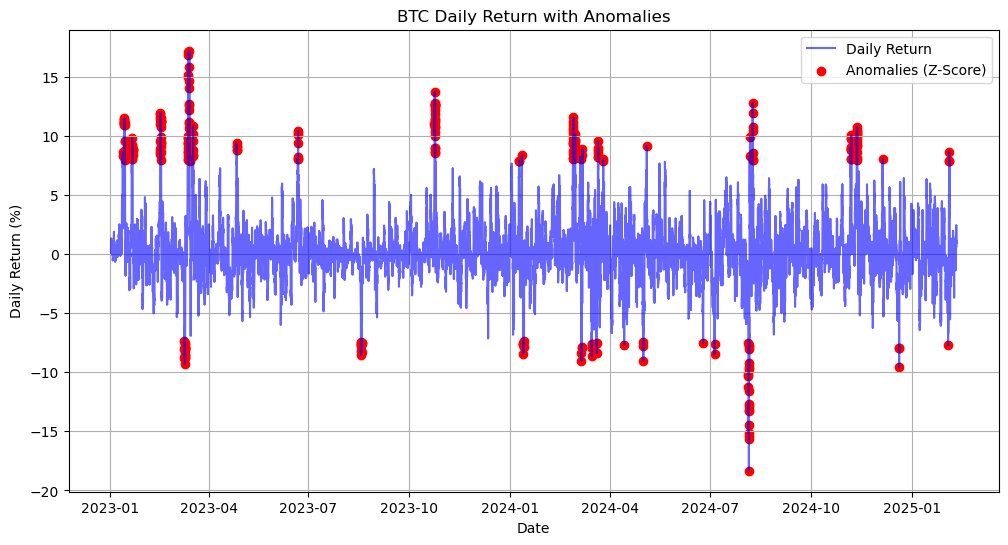

                  max        min
utc_date                        
2023-01-12   8.595067   8.282767
2023-01-14  11.485623   7.910061
2023-01-21   9.791898   7.993739
2023-02-15   9.562304   8.454499
2023-02-16  11.905141   7.978592
2023-03-09  -8.063631  -8.786248
2023-03-10  -7.337655  -9.330247
2023-03-13  17.048214   7.933492
2023-03-14  17.186328   7.871594
2023-03-17  10.150498   8.278661
2023-03-18  10.809603  10.809603
2023-04-26   9.374743   8.779404
2023-06-21  10.400392   8.048121
2023-08-17  -8.561905  -8.561905
2023-08-18  -7.407330  -8.269252
2023-10-23  10.947985  10.274973
2023-10-24  13.726402   8.557991
2024-01-09   7.887057   7.864920
2024-01-11   8.359923   8.359923
2024-01-12  -7.716261  -8.444817
2024-01-13  -7.394854  -7.834845
2024-02-27  11.541669   8.044542
2024-02-28   9.596469   8.173447
2024-02-29  10.127990   8.072614
2024-03-04   8.217350   8.162813
2024-03-05   8.000273  -9.035446
2024-03-06   8.851270  -7.977534
2024-03-15  -7.623056  -8.650684
2024-03-19

In [13]:
from scipy.stats import zscore

df_sub = df[df['year']>=2023].copy()

# Compute daily percentage change
df_sub['daily_return'] = df_sub['close'].pct_change(24) * 100

# Compute rolling standard deviation (volatility) for different periods
df_sub['rolling_std_7d'] = df_sub['daily_return'].rolling(window=7).std()
df_sub['rolling_std_30d'] = df_sub['daily_return'].rolling(window=30).std()

# Z-score method for anomaly detection
df_sub['z_score'] = zscore(df_sub['daily_return'], nan_policy='omit')

# Identify anomalies where absolute Z-score is greater than 3
df_sub['is_anomaly_zscore'] = df_sub['z_score'].abs() > 3

# Plot daily return and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_sub['utc_dt'], df_sub['daily_return'], label='Daily Return', color='blue', alpha=0.6)
plt.scatter(df_sub[df_sub['is_anomaly_zscore']]['utc_dt'], df_sub[df_sub['is_anomaly_zscore']]['daily_return'], color='red', label='Anomalies (Z-Score)')
plt.title("BTC Daily Return with Anomalies")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.grid()
plt.show()

# Print identified days with anomaly
df_sub['utc_date'] = df_sub['utc_dt'].apply(lambda x: x.date())
daily_volatility = df_sub[df_sub['is_anomaly_zscore']].groupby('utc_date')['daily_return'].agg(['max','min'])
print(daily_volatility)



#### Hour-of-Day patterns

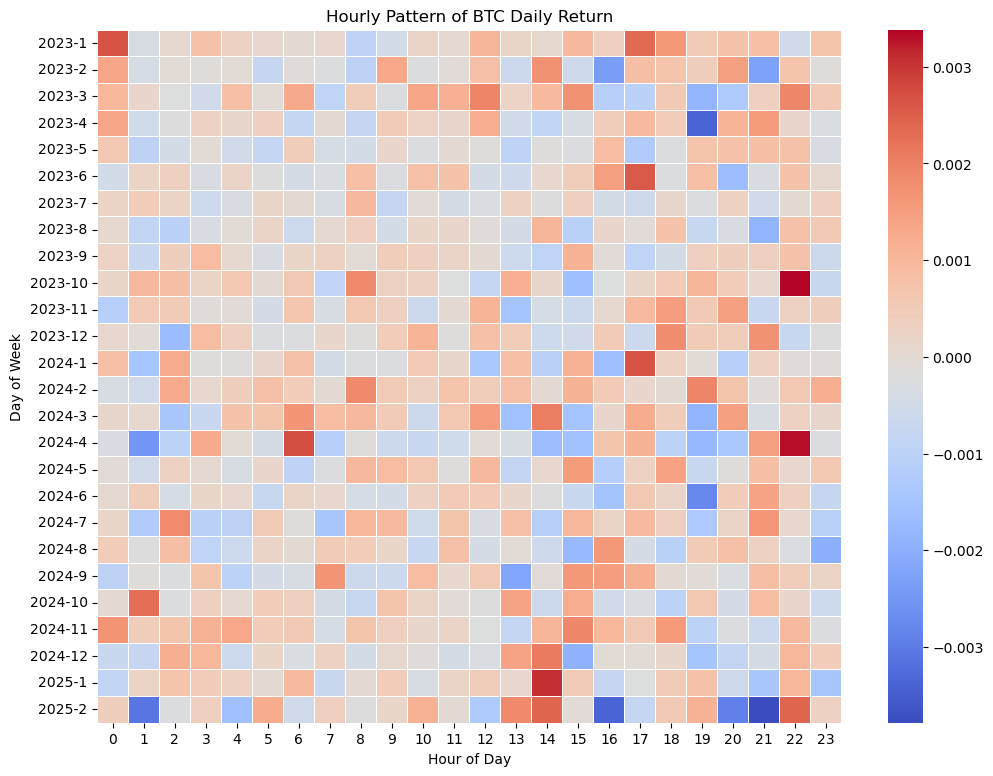

In [14]:
df_sub['hourly_return'] = df_sub['close'].pct_change()
hourly_pattern = df_sub.groupby(['year','month','hour'])['hourly_return'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(hourly_pattern, cmap="coolwarm", linewidths=0.5)

# Titles and labels
plt.title("Hourly Pattern of BTC Daily Return")
plt.xlabel("Hour of Day")
plt.ylabel("Year-Month")

# Show plot
plt.show()

#### Day-of-Week Pattern

In [15]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 72673 to 91192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype                           
---  ------             --------------  -----                           
 0   time               18520 non-null  int64                           
 1   utc_dt             18520 non-null  datetime64[ns, UTC]             
 2   nyc_dt             18520 non-null  datetime64[ns, America/New_York]
 3   high               18520 non-null  float64                         
 4   low                18520 non-null  float64                         
 5   open               18520 non-null  float64                         
 6   close              18520 non-null  float64                         
 7   volumefrom         18520 non-null  float64                         
 8   volumeto           18520 non-null  float64                         
 9   avg                18520 non-null  float64                         
 10  year  

C:\Users\elisa\AppData\Local\Temp\ipykernel_17984\2942799101.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sub2['week'] = df_sub2['utc_dt'].dt.week


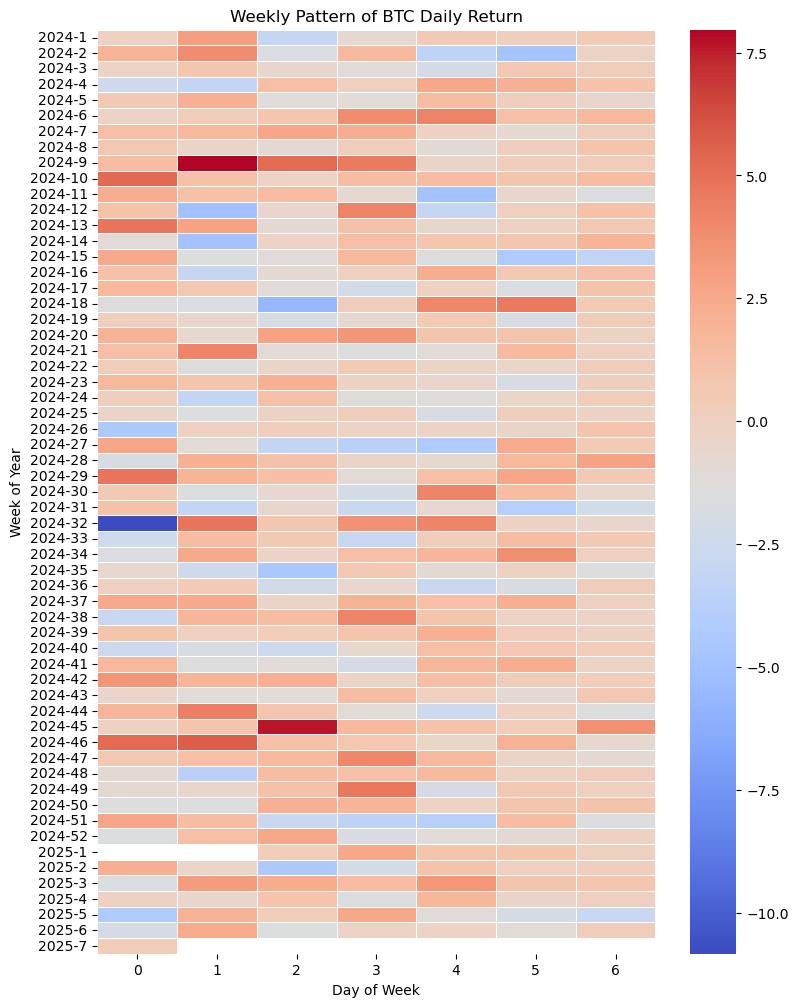

In [18]:
df_sub2 = df_sub[df_sub['year']>=2024].copy()
df_sub2['week'] = df_sub2['utc_dt'].dt.week
dow = df_sub2.groupby(['year','week','weekday'])['daily_return'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(9, 12))
sns.heatmap(dow, cmap="coolwarm", linewidths=0.5)

# Titles and labels
plt.title("Weekly Pattern of BTC Daily Return")
plt.xlabel("Day of Week") # Monday=0, Sunday=6
plt.ylabel("Week of Year")

# Show plot
plt.show()